In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.shape

(5000, 7)

In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.drop("Address",axis=1,inplace=True)

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

In [11]:
print(f"Coef :- {linreg.coef_}")
print(f"Intercept :- {linreg.intercept_}")

Coef :- [2.16507575e+01 1.65110581e+05 1.21006437e+05 2.05110289e+03
 1.52222857e+01]
Intercept :- -2643094.1286581694


In [12]:
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse , r2_score

In [13]:
print(f"MAE :- {mae(ytest,ypred)}")
print(f"MSE :- {mse(ytest,ypred)}")
print(f"RSME :- {mse(ytest,ypred)**5}")
print(f"Accuracy :- {r2_score(ytest,ypred)}")

MAE :- 82503.94882630522
MSE :- 10552187119.566425
RSME :- 1.3083152970396305e+50
Accuracy :- 0.9181602268020818


In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
coef = pd.DataFrame(linreg.coef_,x.columns,columns =["Coefficient"])
coef

,Coefficient
Avg. Area Income,21.650757
Avg. Area House Age,165110.581287
Avg. Area Number of Rooms,121006.436626
Avg. Area Number of Bedrooms,2051.102891
Area Population,15.222286


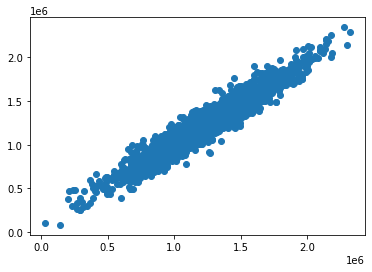

In [24]:
plt.scatter(ytest,ypred)
plt.show()